Brinjikji, Marah: Grade=95/100 No caption on figure in Exercise 3

# <font color = "red">Exercise 1:</font>

Create two 4x4 matrices and use Python and Numpy to perform a matrix multiplication. Confirm your result and show your work.

In [1]:
import numpy as np
from astropy.io import fits
from scipy import ndimage
% matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["savefig.dpi"] = 100  # this makes all the plots a little bigger
from numpy import *
from scipy import optimize
from pylab import *

/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
mat1 = np.array([[1,2,3,4],[2,3,4,5],[3,4,5,6],[4,5,6,7]])
mat2 = np.array([[4,5,6,7],[3,4,5,6],[2,3,4,5],[1,2,3,4]])
print mat1
print mat2
ans = np.dot(mat1,mat2)
print ans

[[1 2 3 4]
 [2 3 4 5]
 [3 4 5 6]
 [4 5 6 7]]
[[4 5 6 7]
 [3 4 5 6]
 [2 3 4 5]
 [1 2 3 4]]
[[ 20  30  40  50]
 [ 30  44  58  72]
 [ 40  58  76  94]
 [ 50  72  94 116]]


To check my work I'm going to do the dot product for the matrices by hand.
So the first row of mat1 is [1,2,3,4] and the first column of mat2 is [4,3,2,1]. The dot product would be 1x4 + 2x3 + 3x2 + 4x1 = 20. This corresponds to the first number in the first row/column.
The second row of mat1 is [2,3,4,5] and the second column of mat2 is [5,4,3,2]. The dot product for these elements would be 2x5 + 3x4 + 4x3 + 5x2 = 44. This corresponds to the number in the second row and second column. These numbers match the answer I got using np.dot. 

# <font color = "red">Exercise 2:</font>

Write code to find <i>k</i> such that <b>fn(x)</b> converges (i.e., that by increasing <i>k</i>, the result no longer changes). 

In [3]:
import math
pi = 3.141592653
def fn(x,y):
    f = 1.0
    for k in range(1, y):
        f += (-1)**k*x**(2*k)/math.factorial(2.*k)
    return f
y=1
while fn(pi/2,y+1) != fn(pi/2,y):
    y+=1
print y

15


# <font color = "red">Exercise 3:</font>
 
Read in the image called <i>andromeda_rot.fits</i>. Make a side-by-side 2-panel figure. The left panel should show the 2D representation of the pixels along with isocontours. The right panel should show a 2D Gaussian fit to the pixel intensities (hint: go to the SciPy cookbook and search for 2D Gaussian). Make the labels be in arcseconds (not pixels). In order to switch from pixels to arcseonds, you will need to extract the image tick values and use the known fact that every pixel is 1.7 arcseconds (the resolution of the instrument).

**Extra Credit**: Re-do the Gaussian fit, but now solve for the rotation angle of the 2D Gaussian (i.e., the covariance).

Filename: andromeda_rot.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      53   (510, 340)   int16 (rescales to uint16)   


/usr/local/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Gaussian parameters:  494.458597871 316.067037175 268.656513573 185.303185445 405.256594542


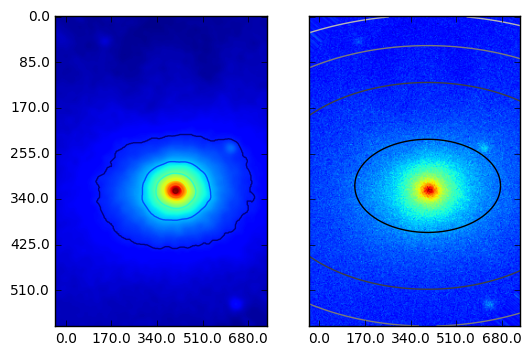

In [4]:
image = fits.info('andromeda_rot.fits')
image
data = fits.getdata('andromeda_rot.fits')
blurred_data = ndimage.gaussian_filter(data,sigma=3)
f, (ax1,ax2) = plt.subplots(1,2, sharey=True)
ax1.imshow(blurred_data)
ax1.contour(blurred_data)
def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*exp(-(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = sqrt(abs((arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[(x),:]
    width_y = sqrt(abs((arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: ravel(gaussian(*p)(*indices(data.shape)) - data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

# Create the gaussian data (with a bit of noise:
ax2.imshow(data, cmap=cm.jet)

params = fitgaussian(data)
fit = gaussian(*params)

#pixel image
ax2.contour(fit(*indices(data.shape)), cmap=cm.Greys)
(height, y, x, width_y, width_x) = params

print 'Gaussian parameters: ', width_x, width_y, x,y,height

label1 = ax1.get_xticks().tolist()
label2 = ax1.get_yticks().tolist()
label1 = [1.7*x for x in label1]
label2 = [1.7*x for x in label2]
ax1.set_xticklabels(label1)
ax1.set_yticklabels(label2)
ax2.set_xticklabels(label1)
ax2.set_yticklabels(label2)

# <font color = "red">Exercise 5:</font>

Discuss how this tutorial enabled you to meet the 6 defined learning goals. For each goal, provide your own insight as to why it is important for modern astronomy.

1. Introduce yourself to the Python language, the use of a notebook, and the use of GIT repositories.
2. Learn how to make and manipulate numerical data as vectors and n-dimensional matrices.
3. Learn how to make, manipulate, and annotate figures.
4. Learn how to read in and manipulate tabular data.
5. Learn how to define functions and to use simple loops in your programming.
6. Learn how to read in and manipulate astronomical image data.

This tutorial enabled me to meet the 6 defined learning goals because it refreshed my knowledge of the Python language and how notebooks work, as I haven't used them since last semester. Getting a tutorial after a few months away from this language is really helpful because I think it's always useful to keep certain functions and keywords fresh in my mind because I tend to forget the little details about certain packages and functions. This tutorial also taught me a lot of astronomy-specific coding, which I will need as I move forward in my career. 
1. These are all important for modern astronomy because (from my experience) these three tools are what most people use to program and save their code.
2. This goal is important because lots of astronomy involves large datasets (i.e. numerical data) so we all need to learn how code using this type of data.
3. Again, making figures is a large part of research in astronomy so we need to know how to do that.
4. This is important because a lot of photometry and spectra is found in text files or csv files--if we don't know how to read in data, we can't do anything with it!
5. Using loops is very important because it enables us to do a lot of coding in a short period of time (or shorter amount of code).
6. This is important because most modern astro research requires manipulating astro data. Without understanding the information produced image gives you, it's useless. 